In [1]:
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
import pandas as pd


## Global DataStore

In [2]:
df=pd.read_excel(r"C:\Users\srile\Downloads\Copy of Global Superstore (1).xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


In [3]:
df.shape

(51290, 24)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

## separation of Continuous variable column and categorical variables

In [5]:
import numpy as np
df_num=df.select_dtypes(include=[np.number])
df_cat=df.select_dtypes(include=["object"])

## Continuous Variable columns

In [6]:
df_num.columns

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost'],
      dtype='object')

## Categorical Variable Columns

In [7]:
df_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

## IMPUTATION-finding the null values

In [8]:
df_num.isnull().sum()

Row ID               0
Postal Code      41296
Sales                0
Quantity             0
Discount             0
Profit               0
Shipping Cost        0
dtype: int64

In [9]:
df_num1=df_num[['Sales', 'Quantity', 'Discount', 'Profit','Shipping Cost']]


In [10]:
df_num1

,Sales,Quantity,Discount,Profit,Shipping Cost
0,2309.650,7,0.0,762.1845,933.570
1,3709.395,9,0.1,-288.7650,923.630
2,5175.171,9,0.1,919.9710,915.490
3,2892.510,5,0.1,-96.5400,910.160
4,2832.960,8,0.0,311.5200,903.040
...,...,...,...,...,...
51285,65.100,5,0.0,4.5000,0.010
51286,0.444,1,0.8,-1.1100,0.010
51287,22.920,3,0.0,11.2308,0.010
51288,13.440,2,0.0,2.4000,0.003


## Removing the datapoints which are more than 75% and less than 25

In [11]:
df_num1["Sales"].describe()

count    51290.000000
mean       246.490581
std        487.565361
min          0.444000
25%         30.758625
50%         85.053000
75%        251.053200
max      22638.480000
Name: Sales, dtype: float64

In [12]:
df_S=df_num1[(df_num1["Sales"]>30.75) & (df_num1["Sales"]<251.05)]

## Plotting Boxplot after Removal

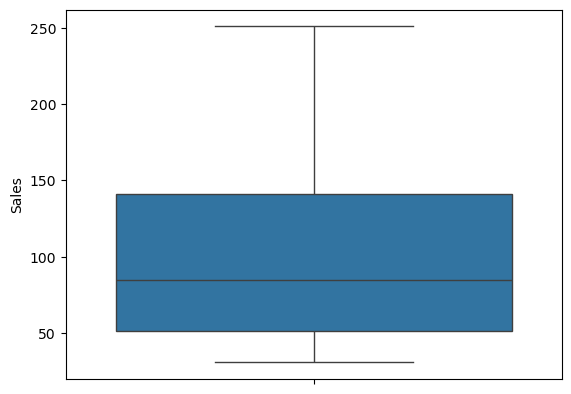

In [13]:
sns.boxplot(y=df_S["Sales"])
plt.show()

## Removing the datapoints which are more than 75% and less than 25%

In [14]:
df_S["Profit"].describe()

count    25645.000000
mean         8.091763
std         47.397554
min      -1144.116000
25%          0.990000
50%         12.960000
75%         28.080000
max        125.280000
Name: Profit, dtype: float64

In [15]:

df_P=df_S[(df_S["Profit"]>0.99)&(df_S["Profit"]<28.08)]

## Plotting Boxplot after Removal

In [16]:
sns.boxplot(y=df_P["Profit"])

<Axes: ylabel='Profit'>

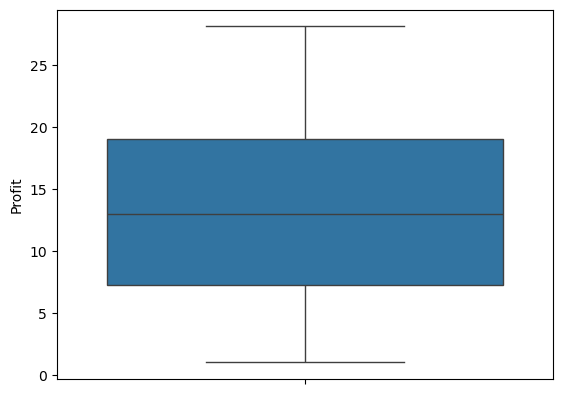

In [17]:
plt.show()


## Removing the datapoints which are more than 75% and less than 25%

In [18]:

df_P["Shipping Cost"].describe()

count    12816.000000
mean         8.708104
std          8.360567
min          0.002000
25%          3.590000
50%          6.140000
75%         10.790000
max         99.980000
Name: Shipping Cost, dtype: float64

In [19]:
df_SC=df_P[(df_P["Shipping Cost"]>3.59)&(df_P["Shipping Cost"]<10.79)]

## Plotting Boxplot after Removal

In [20]:
sns.boxplot(y=df_SC["Shipping Cost"])

<Axes: ylabel='Shipping Cost'>

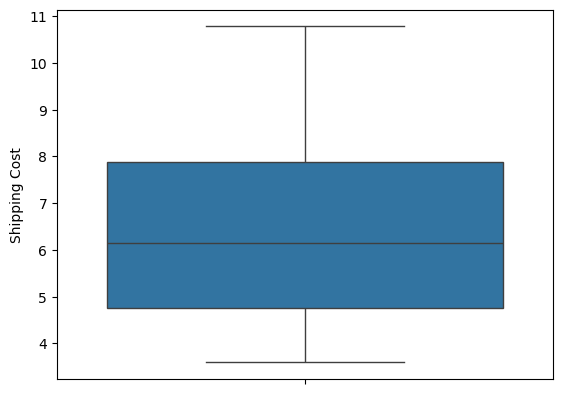

In [21]:
plt.show()

## Standard Scaler

In [22]:

from sklearn.preprocessing import StandardScaler

In [23]:

sc=StandardScaler()

In [24]:

sco=sc.fit(df_SC)

In [25]:

df_num_standard_scaler=sco.fit_transform(df_SC)

In [26]:
sns.boxplot(df_num_standard_scaler)

<Axes: >

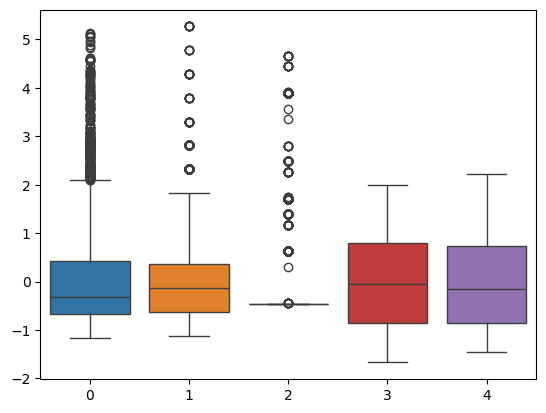

In [27]:
plt.show()

## MinMax Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
mms=MinMaxScaler()

In [30]:

mmso=mms.fit(df_SC)

In [31]:
df_num_minmax_scaler=mmso.fit_transform(df_SC)

In [32]:
sns.boxplot(df_num_minmax_scaler)

<Axes: >

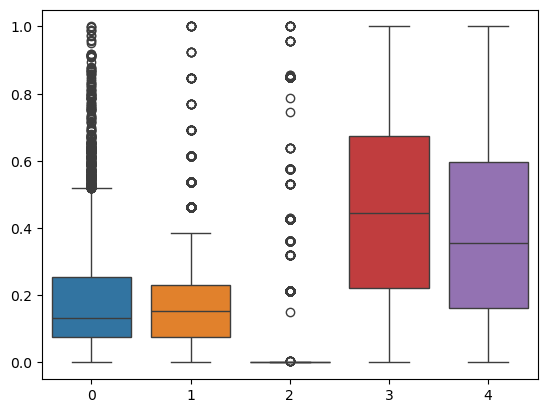

In [33]:
plt.show()

## Categorical Variable columns

In [34]:
df_cat.columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority'],
      dtype='object')

## Finding Null values in categorical variables

In [35]:
df_cat.isnull().sum()

Order ID          0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Order Priority    0
dtype: int64

## Checking values

In [36]:
df_cat[['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Order Priority']].nunique()


Order ID          25035
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Order Priority        4
dtype: int64

## Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le=LabelEncoder()

In [39]:
df_cat=df_cat.apply(le.fit_transform)

df_cat.head()

In [40]:
df_SC.shape

(6406, 5)

In [41]:
df_cat=df_cat.loc[df_SC.index.values,:]

## Concatenate Numerical Values and Categorical values

In [42]:
d1=pd.DataFrame(df_num_standard_scaler,columns=df_num1.columns)

In [43]:

d1.reset_index(inplace=True)

In [44]:

df_cat.reset_index(inplace=True)

In [45]:

df_final=pd.concat([d1,df_cat],axis=1)

In [46]:
df_final.shape

(6406, 22)

In [47]:
df_final.head()

,index,Sales,Quantity,Discount,Profit,Shipping Cost,index,Order ID,Ship Mode,Customer ID,...,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,0,-0.408607,-0.135049,-0.472037,1.569088,2.217861,21750,18747,0,1043,...,2710,837,17,5,10,6503,1,12,1303,1
1,1,1.990749,-0.135049,-0.472037,1.017641,2.215309,21753,5730,3,87,...,3342,833,44,4,3,2985,1,2,653,3
2,2,4.111351,1.830026,1.715227,1.436335,2.215309,21756,4406,3,263,...,772,742,139,6,6,2765,1,1,1445,3
3,3,-0.249054,0.356220,-0.472037,-0.215005,2.215309,21760,21660,2,219,...,2597,348,116,1,0,4730,1,12,1315,1
4,4,2.440791,-0.135049,-0.472037,-1.184091,2.210205,21763,6108,3,780,...,815,311,138,4,7,3069,1,2,709,3


## Final DataSet

In [48]:
df_final

,index,Sales,Quantity,Discount,Profit,Shipping Cost,index,Order ID,Ship Mode,Customer ID,...,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
0,0,-0.408607,-0.135049,-0.472037,1.569088,2.217861,21750,18747,0,1043,...,2710,837,17,5,10,6503,1,12,1303,1
1,1,1.990749,-0.135049,-0.472037,1.017641,2.215309,21753,5730,3,87,...,3342,833,44,4,3,2985,1,2,653,3
2,2,4.111351,1.830026,1.715227,1.436335,2.215309,21756,4406,3,263,...,772,742,139,6,6,2765,1,1,1445,3
3,3,-0.249054,0.356220,-0.472037,-0.215005,2.215309,21760,21660,2,219,...,2597,348,116,1,0,4730,1,12,1315,1
4,4,2.440791,-0.135049,-0.472037,-1.184091,2.210205,21763,6108,3,780,...,815,311,138,4,7,3069,1,2,709,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,6401,-0.372187,-0.135049,-0.472037,0.466194,-1.450420,34964,16574,3,875,...,477,955,17,5,10,3097,1,2,3070,3
6402,6402,-0.209166,-0.135049,-0.472037,1.974563,-1.450930,34965,16710,3,1152,...,2604,808,81,5,7,7496,1,15,143,3
6403,6403,-0.372187,-0.135049,-0.472037,1.877249,-1.451440,34966,18333,2,860,...,3435,320,17,5,10,3167,1,2,499,3
6404,6404,-1.034676,-0.135049,-0.472037,-1.382774,-1.452461,34967,17982,3,242,...,432,846,17,5,10,1511,0,9,3412,3


## Model Training

In [49]:
Y=df_final["Sales"]

In [50]:
X=df_final.drop(["Sales"],axis=1)

## Spliting the Data for Training(70%) and Testing(30%)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

## LinearRegression Training Score

In [52]:

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
lm=linreg.fit(X_train,y_train)
lm.score(X_train,y_train)

0.3405251583222093

## DecisionTreeRegressor Training Score

In [53]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="friedman_mse")
dt1=dtr.fit(X_train,y_train)
dt1.score(X_train,y_train)

1.0

## RandomForestRegressor Training Score

In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500,max_depth=10)
rf1=rf.fit(X_train,y_train)
rf1.score(X_train,y_train)

0.7618867870571963

## Model Validation

In [55]:
from sklearn.metrics import accuracy_score,r2_score

## RandomForestRegressor Testing Score

In [56]:
rf_y_pred=rf1.predict(X_test)
r2_score(y_test,rf_y_pred)

0.4849192663714036

## LinearRegression Testing Score

In [57]:
lm_y_pred=lm.predict(X_test)
r2_score(y_test,lm_y_pred)

0.3920421026073395

## DecisionTreeRegressor Testing Score

In [58]:
dt_y_pred=dt1.predict(X_test)
r2_score(y_test,dt_y_pred)

-0.10044091688784573